# Intro

## Load

In [1]:
import os, sys, pickle
import numpy as np
from tqdm.notebook import trange, tqdm

In [2]:
from tesste import tesste
from ppp import ppp

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


In [4]:
import seaborn as sns
sns.set_theme()

In [17]:
from bicm import BipartiteGraph as BiG

## Homemade modules

In [5]:
import melt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sarawalk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sarawalk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data

In [6]:
chatgpt_folder='chatgpt_summaries/'

In [7]:
with open(chatgpt_folder+'chatgpt_shell_2015_text.pickle', 'rb') as f:
    chatgpt_shell_2015=pickle.load(f)

# Cosine similarity of the various examples

In [7]:
chatgpt_shell_2015.keys()

dict_keys(['Example1', 'Example2', 'Example3', 'Example4', 'Example5'])

In [8]:
keys=list(chatgpt_shell_2015.keys())
l_keys=len(keys)

In [9]:
pvals=np.zeros((l_keys,l_keys))
cos_sims=np.zeros((l_keys,l_keys))
for i in trange(l_keys):
    text_i=chatgpt_shell_2015[keys[i]]
    for j in trange(i+1, l_keys, leave=False):
        text_j=chatgpt_shell_2015[keys[j]]
        cacca=tesste(text_i, text_j)
        cos_sims[i, j]=cacca.cos_sim
        pvals[i, j]=cacca.pval

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings

  0%|          | 0/1000 [00:00<?, ?it/s]

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

## Plot

In [ ]:
with open(chatgpt_folder+'chatgpt_shell_2015_cosine.pickle', 'rb') as f:
    cs_dict=pickle.load(cs_dict, f)
cos_sims=cs_dict['cos_sims']
pvals=cs_dict['pvals']

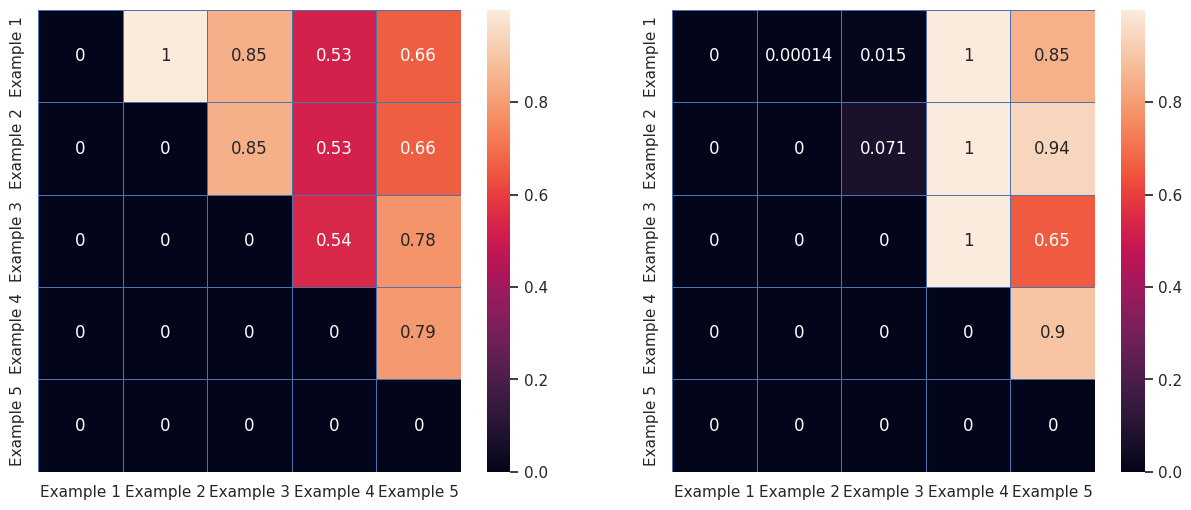

In [23]:
f, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

sns.heatmap(cos_sims, annot=True, linewidths=.5, ax=axs[0], linecolor='b')
sns.heatmap(pvals, annot=True, linewidths=.5, ax=axs[1], linecolor='b')
for ax in axs:
    _yticks=ax.get_yticks()
    ax.set_yticks(ticks=_yticks, labels=['Example '+str(i) for i in range(1, 6)])
    _xticks=ax.get_xticks()
    ax.set_xticks(ticks=_yticks, labels=['Example '+str(i) for i in range(1, 6)])
    
plt.show()

## Save me!

In [40]:
cs_dict={}
cs_dict['cos_sims']=cos_sims
cs_dict['pvals']=pvals

In [42]:
with open(chatgpt_folder+'chatgpt_shell_2015_cosine.pickle', 'wb') as f:
    pickle.dump(cs_dict, f)

# Bag-of-words: Melt & beyond

## Use the auxiliary function of Melt 

...and get inspiration for the next generation of Melt.

In [8]:
texts=[chatgpt_shell_2015[key] for key in chatgpt_shell_2015.keys()]

In [9]:
cacca=melt.melt(texts, binary=False)

In [16]:
for key in cacca.biadj_list.keys():
    print(key)
    mydict=cacca.biadj_list[key]
    _keys=list(mydict.keys())
    _keys.sort(key=mydict.__getitem__, reverse=True)
    for _k in _keys[:10]:
        print((_k, mydict[_k]))

0
('shell', 15)
('energi', 10)
('report', 8)
('sustain', 8)
('safeti', 7)
('environment', 6)
('oper', 6)
('communiti', 5)
('compani', 5)
('emiss', 5)
1
('shell', 18)
('energi', 14)
('sustain', 12)
('develop', 9)
('oper', 9)
('report', 8)
('compani', 7)
('safeti', 7)
('communiti', 6)
('emiss', 6)
2
('shell', 20)
('energi', 16)
('compani', 12)
('sustain', 11)
('develop', 10)
('goal', 6)
('sdgs', 6)
('support', 6)
('oper', 5)
('sdg', 5)
3
('shell', 22)
('sdg', 17)
('communiti', 10)
('compani', 10)
('energi', 10)
('invest', 10)
('support', 9)
('report', 7)
('contribut', 6)
('develop', 6)
4
('sdg', 17)
('shell', 14)
('energi', 10)
('compani', 8)
('explicit', 8)
('mention', 8)
('communiti', 6)
('invest', 6)
('support', 6)
('sustain', 6)


## Weighted validation

### Get the strength list

In [140]:
s_texts=[]
for key in cacca.biadj_list.keys():
    aux=sum(cacca.biadj_list[key].values())
    s_texts.append(aux)

In [141]:
s_texts

[324, 426, 393, 488, 354]

In [183]:
tokens=[]
s_tokens=[]
for key in cacca.biadj_list.keys():
    for skey in cacca.biadj_list[key].keys():
        if skey not in ['sdgs', 'sdg']:
            new_token=skey
        else:
            new_token='sdgs'
        if new_token not in tokens:
            tokens.append(new_token)
            s_tokens.append(cacca.biadj_list[key][skey])
        else:
            _index=tokens.index(new_token)
            s_tokens[_index]+=cacca.biadj_list[key][skey]

In [184]:
len(tokens)

341

#### Where are the SDGs?

In [185]:
tokens_dict=dict(zip(tokens, s_tokens))

In [186]:
tokens_dict['sdgs']

52

In [187]:
s_tokens.sort(reverse=True)

tokens.sort(key=tokens_dict.__getitem__, reverse=True)

In [188]:
tokens

['shell',
 'energi',
 'sdgs',
 'sustain',
 'compani',
 'develop',
 'communiti',
 'invest',
 'oper',
 'support',
 'report',
 'emiss',
 'environment',
 'reduc',
 'safeti',
 'goal',
 'includ',
 'gas',
 'transit',
 'improv',
 'local',
 'technolog',
 'aim',
 'contribut',
 'advanc',
 'climat',
 'initi',
 'program',
 'collabor',
 'respons',
 'social',
 'address',
 'focus',
 'govern',
 'innov',
 'like',
 'manag',
 'busi',
 'impact',
 'industri',
 'work',
 'mention',
 'biofuel',
 'econom',
 'water',
 'carbon',
 'ccs',
 'commit',
 'environ',
 'greenhous',
 'hydrogen',
 'low-carbon',
 'zero',
 'clean',
 'explicit',
 'captur',
 'co2',
 'effort',
 'global',
 'partnership',
 'practic',
 'research',
 'spill',
 'project',
 'achiev',
 'drive',
 'emphas',
 'futur',
 'highlight',
 'key',
 'natur',
 'perform',
 'review',
 'signific',
 'specif',
 'action',
 'challeng',
 'chang',
 'effici',
 'enhanc',
 'growth',
 'institut',
 'use',
 'strategi',
 'well-b',
 'new',
 'partner',
 'promot',
 'solar',
 'storag',

### Get the biadjacency matrix

In [191]:
biadiacency_matrix=np.zeros((len(s_texts), len(tokens)), dtype='int')

In [192]:
for key in cacca.biadj_list.keys():
    for skey in cacca.biadj_list[key].keys():
        # merging 'sdg' and 'sdgs' entries together
        if skey not in ['sdgs', 'sdg']:
            j=tokens.index(skey)
        else:
            j=tokens.index('sdgs')
        biadiacency_matrix[key, j]+=cacca.biadj_list[key][skey]

In [193]:
biadiacency_matrix[:, sdg_index]

array([ 0,  5, 11, 18, 18])

### Validation 

**SPOILER!** The matrix is too small to observe anything!

In [194]:
myGraph=BiG()

In [195]:
myGraph.set_biadjacency_matrix(biadiacency_matrix)

Discrete weighted model: BiWCM_d


In [196]:
myGraph.get_validated_matrix(significance=0.01, validation_method='fdr')

First I have to compute the BiCM. Computing...


/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/numba/core/utils.py:643: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


max rows error = 1.2891001056737474e-07
max columns error = 2.413514053874846e-07
total error = 6.894482929779563e-06
Solver converged.
No V-motifs will be validated. Try increasing alpha


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [197]:
np.min(myGraph.get_weighted_pvals_mat())

0.032108367193543694

### Projection?

In [198]:
w_mat=np.dot(biadiacency_matrix.T, biadiacency_matrix)

In [199]:
w_mat-=np.diag(np.diag(w_mat))
for i in range(len(tokens)):
    for j in range(i+1, len(tokens)):
        w_mat[j, i]=0
        

In [200]:
flat_matrix=w_mat.flatten()

In [201]:
top15=flat_matrix[np.argsort(-flat_matrix)][:15]

In [202]:
for i in top15:
    aux=np.where(w_mat==i)
    _tokens=[tokens[a[0]] for a in aux]
    print(i, _tokens)

1082 ['shell', 'energi']
958 ['shell', 'sdgs']
773 ['shell', 'compani']
772 ['shell', 'sustain']
609 ['shell', 'develop']
606 ['energi', 'sdgs']
544 ['energi', 'sustain']
534 ['shell', 'invest']
527 ['shell', 'communiti']
526 ['shell', 'oper']
520 ['energi', 'compani']
504 ['shell', 'support']
491 ['sdgs', 'compani']
472 ['shell', 'report']
426 ['energi', 'develop']


## Binary validation

Let's make something a la ECI, i.e. binarization (using the BiWCM instead of RCA) and then a validated projection. 

In [204]:
biadiacency_matrix

array([[15, 10,  0, ...,  0,  0,  0],
       [18, 14,  5, ...,  0,  0,  0],
       [20, 16, 11, ...,  0,  0,  0],
       [22, 10, 18, ...,  1,  1,  1],
       [14, 10, 18, ...,  0,  0,  0]])

### Binarization

In [205]:
myGraph=BiG()

In [206]:
myGraph.set_biadjacency_matrix(biadiacency_matrix)

Discrete weighted model: BiWCM_d


In [207]:
myGraph.solve_tool()

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/numba/core/utils.py:643: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


max rows error = 1.2891001056737474e-07
max columns error = 2.413514053874846e-07
total error = 6.894482929779563e-06
Solver converged.


In [210]:
binarized_matrix=biadiacency_matrix>=myGraph.avg_mat
binarized_matrix=binarized_matrix.astype(int)

In [212]:
np.sum(binarized_matrix)/np.prod(binarized_matrix.shape)

0.4087976539589443

### Validated projection?

In [215]:
myGraph=BiG()
myGraph.set_biadjacency_matrix(binarized_matrix)

In [216]:
aux=myGraph.get_cols_projection()

First I have to compute the BiCM. Computing...


/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/numba/core/utils.py:643: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/bicm/models_functions.py:326: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/bicm/models_functions.py:327: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/numba/core/utils.py:643: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


max rows error = 3.114450919383671e-10
max columns error = 1.1958256607158546e-10
total error = 3.1091338392741363e-09
Solver converged.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 341/341 [00:02<00:00, 116.32it/s]


No V-motifs will be validated. Try increasing alpha


## Extract info about SDGs

Alessia and Jonida chose for the 'Example5' entry that already organizes the report in terms of the various SDGs. In this sense it could be helpful to convert the text to a dictionary where the keys are the SDGs.

In [252]:
text=chatgpt_shell_2015['Example5']

### Functions

In [240]:
# the information contained here is the same of the entire text, but organised per SDG...
def text2dict(text):
    sdgs_dict={}
    counter=0
    aux=text.split('\n')
    while counter<len(aux):
        _a=aux[counter]
        if len(_a)>0:
            if _a[:3]=='SDG' and aux[counter+1]!='Not explicitly mentioned.':
                sdgs_dict[_a]=aux[counter+1]
                counter+=2
            elif _a[:3]=='SDG' and aux[counter+1]=='Not explicitly mentioned.':
                counter+=2
        else:
            counter+=1
    return sdgs_dict

In [247]:
# while here is brutally binarized by presence/absence of mention in the report of the given SDG
def text2vec(text):
    # there are 17 sdgs
    sdgs_vec=np.zeros(17, dtype=int)
    aux=text.split('\n')
    counter=0
    sdgs_vec_i=0
    while counter<len(aux):
        _a=aux[counter]
        if len(_a)>0:
            if _a[:3]=='SDG' and aux[counter+1]!='Not explicitly mentioned.':
                sdgs_vec[sdgs_vec_i]=1
                counter+=2
                sdgs_vec_i+=1
            elif _a[:3]=='SDG' and aux[counter+1]=='Not explicitly mentioned.':
                counter+=2
                sdgs_vec_i+=1
        else:
            counter+=1
    return sdgs_vec

In [250]:
text2dict(text)

{'SDG 3: Good Health and Well-being': 'Shell’s commitment to health and safety is highlighted through its "Goal Zero" ambition, which aims for no harm to people. The company also invests in community health programs and initiatives to improve road safety and overall well-being.',
 'SDG 6: Clean Water and Sanitation': 'While clean water and sanitation are not explicitly mentioned, Shell’s environmental policies ensure responsible water management in its operations. Projects include measures to reduce water usage and manage wastewater effectively.',
 'SDG 7: Affordable and Clean Energy': 'Shell invests significantly in renewable energy sources like wind, solar, and advanced biofuels. The company is developing hydrogen as a transport fuel and advancing carbon capture and storage (CCS) technology to reduce greenhouse gas emissions, supporting the transition to a low-carbon energy system.',
 'SDG 8: Decent Work and Economic Growth': 'Shell’s operations contribute to economic development and

In [248]:
text2vec(text)

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [257]:
# check
len(text2dict(text).keys())==np.sum(text2vec(text))

True